In [18]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [28]:
class City:
    def __init__(self, name, longitude, latitude):
        self.name = name
        self.longitude = longitude
        self.latitude = latitude
def read_csv(file):
    with open(file,'r') as f:
        data = f.readlines()[1:]
        city_list = []
        for line in data:
            line = line.strip().split(',')
            city_list.append(City(line[0],float(line[1]),float(line[2])))
        return city_list
cities = read_csv('Data set CSV.csv')
for city in cities:

    print(city.name,city.longitude,city.latitude)



1 5.5e-08 9.86e-09
2 -28.8733 -7.98e-08
3 -79.2916 -21.4033
4 -14.6577 -43.3896
5 -64.7473 21.8982
6 -29.0585 -43.2167
7 -72.0785 0.181581
8 -36.0366 -21.6135
9 -50.4808 7.37447
10 -50.5859 -21.5882
11 -0.135819 -28.7293
12 -65.0866 -36.0625
13 -21.4983 7.31942
14 -57.5687 -43.2506
15 -43.07 14.5548


In [31]:
class Ant:
    def __init__(self, cities, alpha, beta):
        self.cities = cities
        self.alpha = alpha
        self.beta = beta
        self.tour = []

    def tour_length(self):
        total_distance = 0.0
        num_cities = len(self.tour)
        for i in range(num_cities):
            current_city = self.tour[i]
            next_city = self.tour[(i + 1) % num_cities]  
            total_distance += self.distance(current_city, next_city)
        return total_distance

    def distance(self, city1, city2):
        return np.sqrt((city1.longitude - city2.longitude) ** 2 + (city1.latitude - city2.latitude) ** 2)

    def select_next_city(self, pheromone_matrix):
        current_city = self.tour[-1]
        unvisited_cities = [city for city in self.cities if city not in self.tour]
        probabilities = []
        total_prob = 0.0

        for city in unvisited_cities:
            pheromone = pheromone_matrix[current_city.name][city.name]
            heuristic = 1.0 / self.distance(current_city, city)
            probabilities.append((city, (pheromone ** self.alpha) * (heuristic ** self.beta)))
            total_prob += probabilities[-1][1]

        probabilities = [(city, prob / total_prob) for city, prob in probabilities]
        selected_city = random.choices([city for city, _ in probabilities], [prob for _, prob in probabilities])[0]
        return selected_city

    def construct_tour(self, pheromone_matrix):
        start_city = random.choice(self.cities)
        self.tour = [start_city]

        while len(self.tour) < len(self.cities):
            next_city = self.select_next_city(pheromone_matrix)
            self.tour.append(next_city)

Iteration 1: Best tour length = 405.6879189225029
Iteration 2: Best tour length = 398.74418777493906
Iteration 3: Best tour length = 398.74418777493906
Iteration 4: Best tour length = 398.74418777493906
Iteration 5: Best tour length = 398.74418777493906
Iteration 6: Best tour length = 398.74418777493906
Iteration 7: Best tour length = 365.02617544204804
Iteration 8: Best tour length = 365.02617544204804
Iteration 9: Best tour length = 350.01974724625836
Iteration 10: Best tour length = 350.01974724625836
Iteration 11: Best tour length = 350.01974724625836
Iteration 12: Best tour length = 350.01974724625836
Iteration 13: Best tour length = 350.01974724625836
Iteration 14: Best tour length = 350.01974724625836
Iteration 15: Best tour length = 350.01974724625836
Iteration 16: Best tour length = 350.01974724625836
Iteration 17: Best tour length = 350.01974724625836
Iteration 18: Best tour length = 350.01974724625836
Iteration 19: Best tour length = 350.01974724625836
Iteration 20: Best tou

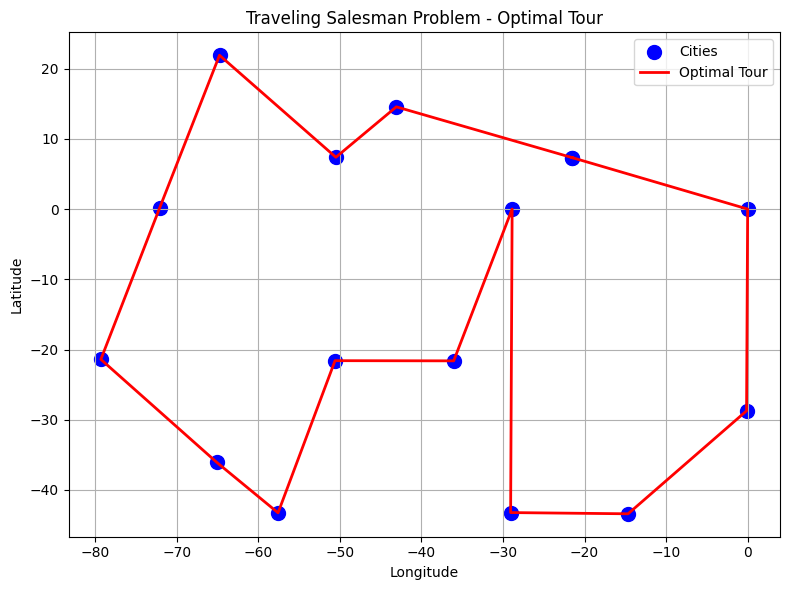

In [36]:

class ACO:
    def __init__(self, cities, num_ants, alpha, beta, rho, num_iterations):
        self.cities = cities
        self.num_ants = num_ants
        self.alpha = alpha
        self.beta = beta
        self.rho = rho
        self.num_iterations = num_iterations
        self.pheromone_matrix = self.initialize_pheromones()

    def initialize_pheromones(self):
        pheromone_matrix = {}
        initial_pheromone = 1.0 

        for city in self.cities:
            pheromone_matrix[city.name] = {neighbor.name: initial_pheromone for neighbor in self.cities if neighbor != city}

        return pheromone_matrix

    def update_pheromones(self, ants):
        for city1 in self.cities:
            for city2 in self.cities:
                if city1 != city2:
                    delta_pheromone = sum(1.0 / ant.tour_length() for ant in ants if city2 in ant.tour and city1 in ant.tour)
                    self.pheromone_matrix[city1.name][city2.name] = (1 - self.rho) * self.pheromone_matrix[city1.name][city2.name] + delta_pheromone

    def run(self):
        best_tour_length = float('inf')
        best_tour = []

        for iteration in range(self.num_iterations):
            ants = [Ant(self.cities, self.alpha, self.beta) for _ in range(self.num_ants)]

            for ant in ants:
                ant.construct_tour(self.pheromone_matrix)

            self.update_pheromones(ants)

            iteration_best_ant = min(ants, key=lambda ant: ant.tour_length())
            if iteration_best_ant.tour_length() < best_tour_length:
                best_tour_length = iteration_best_ant.tour_length()
                best_tour = iteration_best_ant.tour

            print(f"Iteration {iteration + 1}: Best tour length = {best_tour_length}")

        return best_tour

def plot_tour(cities, tour):
    city_names = [city.name for city in cities]
    tour_indices = [city_names.index(city.name) for city in tour]
    tour_indices.append(tour_indices[0]) 

    tour_cities = [cities[idx] for idx in tour_indices]
    tour_x = [city.longitude for city in tour_cities]
    tour_y = [city.latitude for city in tour_cities]

    plt.figure(figsize=(8, 6))
    plt.scatter(tour_x, tour_y, color='blue', s=100, label='Cities')
    plt.plot(tour_x, tour_y, color='red', linewidth=2, linestyle='-', label='Optimal Tour')
    plt.title('Traveling Salesman Problem - Optimal Tour')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

aco = ACO(cities, num_ants=10, alpha=1.0, beta=2.0, rho=0.1, num_iterations=50)
best_tour = aco.run()

print("Best Tour:", [city.name for city in best_tour])
plot_tour(cities, best_tour)
